In [1]:
# Importation of our own tools
import portfolio_functions as pf
import tickers_select as tckrs
%load_ext autoreload
%autoreload 2

# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={"figure.figsize":(12, 8)},style="whitegrid")
plt.rcParams['font.family'] = 'serif'

# 1. Formating Datas

In [4]:
# Importation of the prices
prices = pd.read_csv("datas/adjusted_daily_prices.csv", index_col=0, parse_dates=True)
# Importation of the selected tickers
tickers = tckrs.tickers

prices = prices[tickers]

# Plotting of the DataFrame
prices.head()

,ASML,MC.PA,NVS,SAP,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,ISP.MI,...,LI.PA,BOL.PA,DIE.BR,GFC.PA,SECU-B.ST,IDVA.SG,FR.PA,LBGUF,COV.PA,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,13.137519,56.599998,33.440810,32.694855,16.481361,4.201927,49.166664,68.918274,53.383133,3.290334,...,21.145081,0.595,13.85,72.335732,12.785884,12.0,10.643333,31.290252,60.918514,54.200001
2005-01-04,12.883060,56.299999,33.091171,31.870259,16.288680,4.216240,48.833332,68.964745,53.524609,3.299682,...,20.494463,0.595,13.96,70.773827,12.710694,12.0,10.683333,31.733229,60.918514,53.849998
2005-01-05,12.698572,55.450001,32.967802,31.784551,15.938569,4.262036,48.299999,68.128250,53.854713,3.327724,...,20.169153,0.590,13.90,70.529778,12.515922,12.0,10.503333,31.737864,60.918514,54.150002
2005-01-06,12.587189,55.650002,33.026834,32.465939,16.181642,4.316150,48.366665,68.453552,53.666080,3.402505,...,20.169153,0.590,13.86,69.797638,12.366672,12.0,10.456666,31.971365,60.820255,54.400002
2005-01-07,12.592865,56.049999,32.965059,33.198153,16.110859,4.310554,47.933334,69.150635,53.854713,3.402505,...,20.494463,0.588,14.13,71.310730,12.395002,12.0,10.450000,32.270195,60.918514,54.299999


In [23]:
# Calculation of the returns and we remove the NaN (at the beginning of the DataFrame and at the end)
rends = prices.pct_change().dropna()

In [21]:
# Printing of the returns
rends.head()

,ASML,MC.PA,NVS,SAP,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,ISP.MI,...,LI.PA,BOL.PA,DIE.BR,GFC.PA,SECU-B.ST,IDVA.SG,FR.PA,LBGUF,COV.PA,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.019369,-0.005300,-0.010455,-0.025221,-0.011691,0.003406,-0.006780,0.000674,0.002650,0.002841,...,-0.030769,0.000000,0.007942,-0.021592,-0.005881,0.0,0.003758,0.014157,0.000000,-0.006458
2005-01-05,-0.014320,-0.015098,-0.003728,-0.002689,-0.021494,0.010862,-0.010921,-0.012129,0.006167,0.008498,...,-0.015873,-0.008403,-0.004298,-0.003448,-0.015323,0.0,-0.016849,0.000146,0.000000,0.005571
2005-01-06,-0.008771,0.003607,0.001791,0.021438,0.015251,0.012697,0.001380,0.004775,-0.003503,0.022472,...,0.000000,0.000000,-0.002878,-0.010381,-0.011925,0.0,-0.004443,0.007357,-0.001613,0.004617
2005-01-07,0.000451,0.007188,-0.001870,0.022553,-0.004374,-0.001297,-0.008959,0.010183,0.003515,0.000000,...,0.016129,-0.003390,0.019481,0.021678,0.002291,0.0,-0.000638,0.009347,0.001616,-0.001838
2005-01-10,0.013300,-0.006244,-0.006846,-0.004195,0.006278,0.008651,0.019471,-0.002016,-0.011384,0.000000,...,0.000000,0.002551,-0.006369,0.004107,0.008505,0.0,0.015311,-0.003736,0.004839,0.014733


In [22]:
# Printing of the returns
rends.tail()

,ASML,MC.PA,NVS,SAP,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,ISP.MI,...,LI.PA,BOL.PA,DIE.BR,GFC.PA,SECU-B.ST,IDVA.SG,FR.PA,LBGUF,COV.PA,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-25,0.000781,-0.002848,0.000781,0.000781,-0.012240,0.000781,-0.005716,-0.004382,-0.019670,-0.000695,...,-0.016740,0.003791,0.008333,-0.006218,-0.015145,0.008983,0.001977,0.000781,-0.002625,0.000565
2022-11-28,-0.010505,-0.002142,0.003570,-0.020130,0.021559,-0.016133,0.011836,-0.000183,-0.002675,-0.019690,...,-0.004480,-0.008499,-0.007163,-0.009385,-0.009383,-0.026710,-0.013251,0.003914,-0.003509,-0.016384
2022-11-29,-0.005640,0.004723,-0.001532,-0.007896,0.023248,0.000505,-0.008021,0.013573,0.002951,0.008743,...,0.002700,-0.002857,-0.012209,-0.002632,-0.009452,0.009148,0.007429,0.002125,-0.007923,0.000000
2022-11-30,0.052761,0.000000,0.027272,0.039057,0.021379,0.022163,0.032682,0.026240,0.016315,-0.023425,...,-0.013914,0.042980,0.025843,-0.002111,-0.033151,0.001236,0.002269,0.002038,-0.015972,0.029293
2022-12-01,0.000081,0.000000,-0.007518,-0.001280,0.001698,-0.008696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001610,0.000000,0.000000,0.000000,0.000000,0.000000


# 2. First static analysis

## a. Details

In this first practical part we will set up and analyze different portfolio strategies (different optimization techniques) in a fairly simple way by considering the period from 2005 to 2010 as test data. This is a static part that is only carried out to understand the functioning of the different optimization functions. Later we will add a dynamic optimization (definition of new weights every quarter) and in the final part we will take into account transaction costs to be more faithful to reality.

In [6]:
# We define the start and end dates of our training set
start_train = "2005-01-01"
end_train = "2010-01-01"
end_test = "2022-01-01"

In [7]:
# We use the separate function of the portfolio_functions module to obtain our training and test DataFrames
rends_train,rends_test = pf.separate(rends,start_train,end_train,end_test)

# We delete the assets that have only null returns or negative annualized returns with the supr_assets function
rends_train,rends_test = pf.supr_assets(rends_train,show=True),pf.supr_assets(rends_test,show=True)

The following assets will be suppressed:
SAP ISP.MI IDEXF AMS.MC LR.PA G.MI VNA.DE CABK.MC SCMN.SW KBC.BR BNR.DE EBS.VI AENA.MC EXO.AS GBLC.CN RDFN BVI.PA ZAL.DE SIG VIV.PA PNDORA.CO WFDRX MB.MI ATL.MI SECU-B.ST IDVA.SG FR.PA LBGUF MF.PA
The following assets will be suppressed:
ISP.MI G.MI CABK.MC EXO.AS GBLC.CN TELIA.ST VIV.PA ATL.MI LI.PA


In [8]:
# On utilise la fonction separate du module portfolio_functions pour obtenir nos DataFrames d'entrainement et de tests We use the separate function of the portfolio_functions module to obtain our training and test DataFrames
prices_train,prices_test = pf.separate(prices,start_train,end_train,end_test)

In [9]:
rends_train.head()

,ASML,MC.PA,NVS,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,CAP.PA,6S=F,...,QGEN,TRN.MI,TELIA.ST,RAND.AS,JMT.LS,LI.PA,BOL.PA,DIE.BR,GFC.PA,COV.PA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.019369,-0.005300,-0.010455,-0.011691,0.003406,-0.006780,0.000674,0.002650,-0.009963,-0.006006,...,0.025191,0.009412,0.003459,-0.001721,0.010152,-0.030769,0.000000,0.007942,-0.021592,0.000000
2005-01-05,-0.014320,-0.015098,-0.003728,-0.021494,0.010862,-0.010921,-0.012129,0.006167,-0.001258,0.000379,...,-0.005236,0.020979,-0.000401,-0.021027,-0.010050,-0.015873,-0.008403,-0.004298,-0.003448,0.000000
2005-01-06,-0.008771,0.003607,0.001791,0.015251,0.012697,0.001380,0.004775,-0.003503,-0.006297,0.002661,...,0.002815,-0.006849,0.009390,0.014084,0.005076,0.000000,0.000000,-0.002878,-0.010381,-0.001613
2005-01-07,0.000451,0.007188,-0.001870,-0.004374,-0.001297,-0.008959,0.010183,0.003515,-0.012252,0.000719,...,0.012090,0.000000,0.002291,-0.006250,0.015152,0.016129,-0.003390,0.019481,0.021678,0.001616
2005-01-10,0.013300,-0.006244,-0.006846,0.006278,0.008651,0.019471,-0.002016,-0.011384,0.065868,-0.001618,...,-0.029835,-0.002299,0.011951,-0.000699,-0.002985,0.000000,0.002551,-0.006369,0.004107,0.004839


In [10]:
rends_test.head()

,ASML,MC.PA,NVS,SAP,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,CAP.PA,...,MB.MI,BOL.PA,DIE.BR,GFC.PA,SECU-B.ST,IDVA.SG,FR.PA,LBGUF,COV.PA,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.009889,0.004083,-0.039932,-0.000354,0.015476,0.021363,0.003215,0.033001,0.015356,0.043165,...,0.000000,0.014354,0.038481,0.024297,0.008178,0.0,0.031594,-0.006719,0.038106,0.049065
2010-01-05,0.011860,-0.004701,0.003084,-0.002142,0.004929,0.010685,0.005341,-0.014594,-0.024330,0.012444,...,0.029833,0.002573,-0.002829,-0.001154,0.006940,0.0,0.039518,0.004039,0.014845,0.002784
2010-01-06,0.006494,0.009702,-0.006249,0.020576,0.010129,0.008960,-0.003719,-0.012245,0.010952,0.019843,...,0.000579,0.010265,-0.001972,-0.024390,-0.005628,0.0,-0.007983,-0.002643,-0.026862,0.011771
2010-01-07,-0.021962,0.011379,-0.002830,0.032464,0.008545,0.014558,-0.011412,0.003070,-0.010667,-0.010454,...,0.022582,-0.000847,0.013659,-0.023289,-0.000569,0.0,0.027017,0.006006,-0.015578,0.002195
2010-01-08,-0.030231,0.013502,0.001581,0.001019,0.008923,0.021620,0.020067,0.031780,-0.007581,0.004255,...,-0.003397,0.001695,0.056226,0.000135,0.005391,0.0,0.000746,-0.006457,-0.000139,0.006242


In [15]:
sorted(pf.annu_rend_df(rends_train).items(), key=lambda x: x[1], reverse=True)

[('JMT.LS', 0.27929),
 ('ABB', 0.25192),
 ('KNEBV.HE', 0.2118),
 ('DIE.BR', 0.14609),
 ('BOL.PA', 0.13672),
 ('QGEN', 0.13343),
 ('RMS.PA', 0.13278),
 ('ASML', 0.12253),
 ('SAMPO.HE', 0.10661),
 ('COLO-B.CO', 0.09674),
 ('CFR.SW', 0.07216),
 ('TRN.MI', 0.06784),
 ('MC.PA', 0.0654),
 ('LI.PA', 0.05901),
 ('CAP.PA', 0.05662),
 ('RAND.AS', 0.03628),
 ('PUB.PA', 0.03376),
 ('TELIA.ST', 0.02811),
 ('COV.PA', 0.02779),
 ('HNR1.DE', 0.02695),
 ('KER.PA', 0.02514),
 ('RI.PA', 0.0227),
 ('SHB-A.ST', 0.01086),
 ('6S=F', 0.00741),
 ('GFC.PA', 0.0053),
 ('ADDYY', 0.00435),
 ('NVS', 0.00347)]

## b. Equally Weighted Portfolio

Certainly the easiest portfolio to create because we just have to allocate this weighting strategy:
$$
\boxed{\omega_{i} = \frac{1}{\#\textrm{assets}},\forall i \in\textrm{assets}}
$$

In [16]:
# We define a dictionary containing the weights associated with each asset
w_equal = {asset:round(1/len(rends_train.columns),3) for asset in rends_train.columns}

# We define a dictionary containing the weights associated with each asset
for key,value in w_equal.items():
    print(f'Asset considéré : {key} ; poid associé : {value}')
print(f"Somme de l'ensemble des poids : {round(sum(w_equal.values()),5)}")
# We remark that the sum of the weights is greater than 1 which is due to the rounding on the weights

Asset considéré : ASML ; poid associé : 0.037
Asset considéré : MC.PA ; poid associé : 0.037
Asset considéré : NVS ; poid associé : 0.037
Asset considéré : CFR.SW ; poid associé : 0.037
Asset considéré : ABB ; poid associé : 0.037
Asset considéré : RMS.PA ; poid associé : 0.037
Asset considéré : KER.PA ; poid associé : 0.037
Asset considéré : RI.PA ; poid associé : 0.037
Asset considéré : CAP.PA ; poid associé : 0.037
Asset considéré : 6S=F ; poid associé : 0.037
Asset considéré : SAMPO.HE ; poid associé : 0.037
Asset considéré : ADDYY ; poid associé : 0.037
Asset considéré : KNEBV.HE ; poid associé : 0.037
Asset considéré : PUB.PA ; poid associé : 0.037
Asset considéré : COLO-B.CO ; poid associé : 0.037
Asset considéré : SHB-A.ST ; poid associé : 0.037
Asset considéré : HNR1.DE ; poid associé : 0.037
Asset considéré : QGEN ; poid associé : 0.037
Asset considéré : TRN.MI ; poid associé : 0.037
Asset considéré : TELIA.ST ; poid associé : 0.037
Asset considéré : RAND.AS ; poid associé : 

In [17]:
# We calculate the return of our portfolio and we create a new column
Portfolio = pd.Series((rends_train*w_equal.values()).sum(axis=1),name="Portfolio")

Text(0.5, 1.0, 'Rendements observés sur la période 2005-01-01 - 2010-01-01')

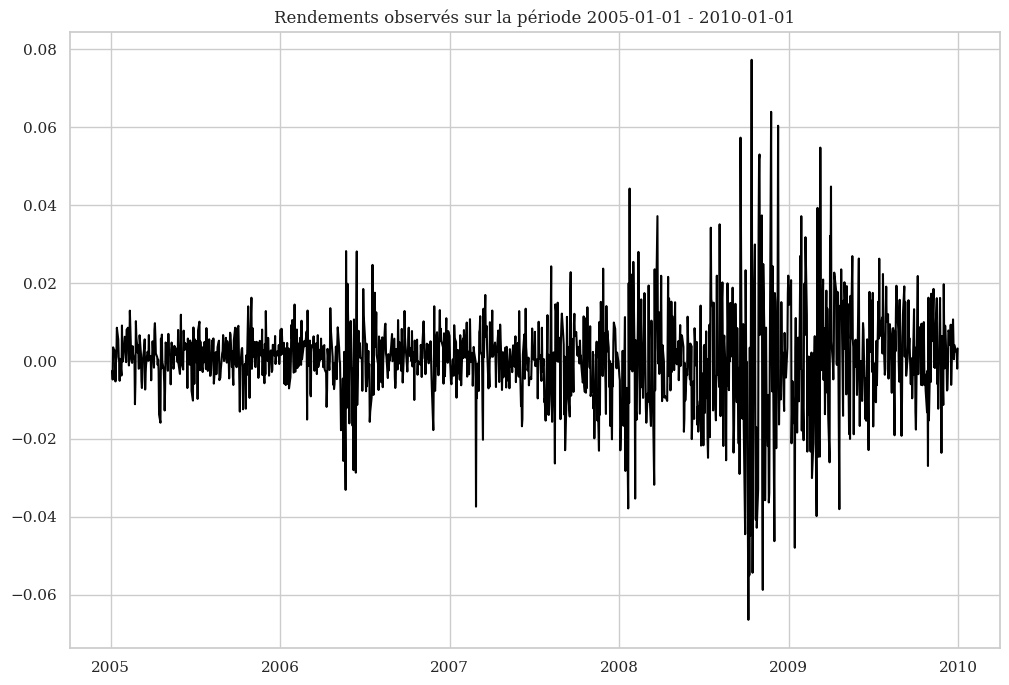

In [20]:
plt.plot(Portfolio,'black')
plt.title("Rendements observés sur la période {} - {}".format(start_train,end_train))

In [15]:
# The calculation of the annualized return is done with the annu_rend function of the portfolio_functions module
annu_rend = pf.annu_rend(Portfolio,show=True)
annu_rend = pf.portfolio_rend(np.array(list(w_equal.values())),rends_train,show=True)
# The two functions are equivalent, they will be used later

# The calculation of the annualized volatility is done with the annu_vol function of the portfolio_functions module
annu_vol = pf.annu_vol(Portfolio,show=True)
annu_vol = pf.portfolio_vol(np.array(list(w_equal.values())),pf.cov(rends_train),show=True)
annu_var = pf.portfolio_var(np.array(list(w_equal.values())),pf.cov(rends_train),show=True)
# The two functions are equivalent, they will be used later

Annualized return on the period: 12.071%.
Annualized return on the period: 12.071%.
Annualized volatility on the period: 19.336%.
Annualized volatility on the period: 19.336%.
Annualized variance on the period: 3.739%.


## c. Mean-Variance Portfolio

We are gonna implement some optimization methods taking into account some constraints. Here we want to optimize the weights in order to minimize the volatility of our portfolio while respecting some constraints:
$$
\textrm{min}\, \omega^{T}\Sigma\omega\\\textrm{s.t}\, \mu^{T}\omega=\mu_{obj} \, \textrm{and} \, \sum_{i=0}^{n}\omega_{i}=1
$$

Where $\omega$ is the weights vector, $\Sigma$ the covariance matrix of our asset bucket, $\mu$ is the annualized returns vector and $\mu_{obj}$ is the objective return.

In [16]:
# To calculate the annualized covariance we use the annu_cov function of the pf module
cov = pf.cov(rends_train)
cov

,ASML,MC.PA,NVS,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,CAP.PA,6S=F,...,QGEN,TRN.MI,TELIA.ST,RAND.AS,JMT.LS,LI.PA,BOL.PA,DIE.BR,GFC.PA,COV.PA
ASML,0.000627,0.000156,0.000141,0.000134,0.000389,0.000108,0.000157,0.000094,0.000199,0.000037,...,0.000209,0.000021,0.000139,0.000225,0.000066,0.000124,0.000055,0.000080,0.000147,0.000098
MC.PA,0.000156,0.000373,0.000041,0.000302,0.000239,0.000199,0.000322,0.000193,0.000283,-0.000029,...,0.000063,0.000074,0.000180,0.000306,0.000137,0.000227,0.000103,0.000144,0.000204,0.000184
NVS,0.000141,0.000041,0.000220,0.000024,0.000149,0.000040,0.000019,0.000056,0.000033,0.000058,...,0.000134,0.000013,0.000048,0.000059,0.000016,0.000038,0.000028,0.000021,0.000018,0.000024
CFR.SW,0.000134,0.000302,0.000024,0.000454,0.000225,0.000190,0.000324,0.000167,0.000282,-0.000030,...,0.000053,0.000066,0.000173,0.000312,0.000143,0.000222,0.000116,0.000147,0.000220,0.000185
ABB,0.000389,0.000239,0.000149,0.000225,0.000686,0.000148,0.000255,0.000175,0.000270,0.000025,...,0.000240,0.000061,0.000187,0.000332,0.000137,0.000209,0.000095,0.000138,0.000198,0.000191
RMS.PA,0.000108,0.000199,0.000040,0.000190,0.000148,0.000409,0.000210,0.000138,0.000184,-0.000015,...,0.000047,0.000057,0.000120,0.000219,0.000099,0.000180,0.000079,0.000104,0.000134,0.000160
KER.PA,0.000157,0.000322,0.000019,0.000324,0.000255,0.000210,0.000548,0.000224,0.000321,-0.000030,...,0.000050,0.000072,0.000196,0.000356,0.000161,0.000256,0.000118,0.000194,0.000261,0.000227
RI.PA,0.000094,0.000193,0.000056,0.000167,0.000175,0.000138,0.000224,0.000404,0.000193,-0.000014,...,0.000051,0.000055,0.000127,0.000205,0.000131,0.000163,0.000067,0.000100,0.000153,0.000161
CAP.PA,0.000199,0.000283,0.000033,0.000282,0.000270,0.000184,0.000321,0.000193,0.000565,-0.000041,...,0.000080,0.000072,0.000192,0.000342,0.000141,0.000241,0.000119,0.000155,0.000219,0.000185
6S=F,0.000037,-0.000029,0.000058,-0.000030,0.000025,-0.000015,-0.000030,-0.000014,-0.000041,0.000089,...,0.000049,-0.000020,-0.000022,-0.000031,-0.000021,-0.000029,-0.000014,-0.000014,-0.000023,-0.000024


Now all the functions are ready to plot an efficient frontier. The important point to know is the bounderies off my weights. We decided to autorise the short selling of assets in order to fit with the gmw portfolio formula. 

In [17]:
# The function opt_mean_variance returns the weights, the annualized return and the annualized volatility
w,r,vol = pf.opt_mean_variance(rends_train,pf.cov(rends_train),obj_rend=0.12071,show=True)

Annualized return on the period: 12.071%.
Annualized volatility on the period: 9.814%.


With a portfolio with the same return than the equally weighted portfolio, we found a smaller volatility. It's coherent because the equally weighted portfolio is note on the efficient frontier.

We created a function in order to find the global minimum variance weight and after return and volatility. The GMV weights are given by this formula:
$$
\boxed{\omega = \frac{\Sigma^{-1}1}{1\Sigma^{-1}1}}
$$

In [18]:
gmv_w,gmv_r, gmv_v = pf.gmv_portfolio(rends_train,cov,show=True)

Annualized return on the period: 6.813%.
Annualized volatility on the period: 9.148%.


We plot the efficient frontier using pf.efficient_frontier with the variable plot = True.

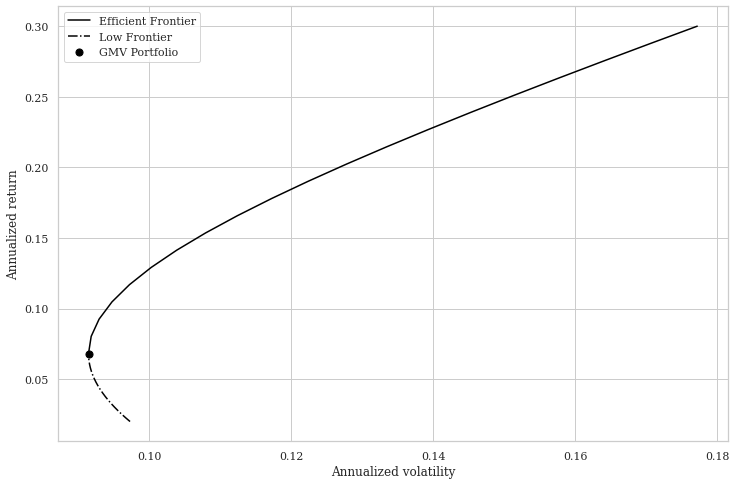

In [19]:
eff = pf.efficient_frontier(rends_train,cov,min=0.02,max=0.3,number=20,plot=True)

## d. Adding Capital Market Line

Calculating the Capital Market Line is just a modification of a constraint in the optimisation function. A new parameter is adding, it's the annualized risk free rate. The new formula for the constraint is the following:
$$
\textrm{min}\, \omega^{T}\Sigma\omega\\\textrm{s.t}\, \mu^{T}\omega+(1-\sum_{i=0}^{n}\omega_{i})r_{\textrm{risk-free rate}}=\mu_{obj} \, \textrm{and} \, \sum_{i=0}^{n}\omega_{i}=1
$$
To modelise this new constraint we just have to modify the optimization function by modifying the covariance matrix, and the returns DataFrame by adding the risk-free rate in them. We also create the new constraint.

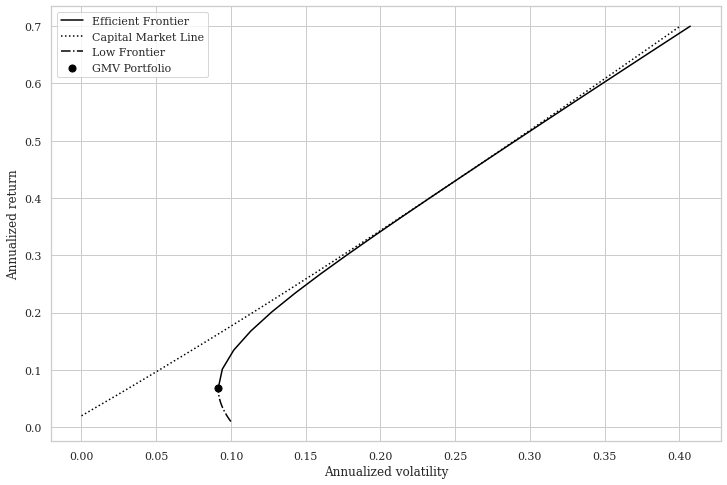

In [20]:
eff,eff_rf = pf.efficient_frontier(rends_train,cov,min=0.01,max=0.7,risk_free = 0.02,number=20,plot=True)

# 3. Dynamic analysis

In order to create a dynamic analysis we will use a function which create DataFrame as many as we want.

In [84]:
# If we want to recalculate the weights of the portfolio 4 times each year
dfs = pf.dynamic_df(rends_train,period_per_year=4)

In [85]:
for i in dfs.keys():
    # We check that the dates are correct for each DataFrame
    print(dfs[i].index[0],dfs[i].index[-1])
    print(dfs[i].shape)

2005-01-04 00:00:00 2005-04-01 00:00:00
(64, 19)
2005-04-04 00:00:00 2005-07-01 00:00:00
(65, 21)
2005-07-04 00:00:00 2005-09-30 00:00:00
(65, 22)
2005-10-03 00:00:00 2005-12-30 00:00:00
(65, 21)
2006-01-02 00:00:00 2006-03-30 00:00:00
(64, 23)
2006-03-31 00:00:00 2006-06-29 00:00:00
(65, 2)
2006-06-30 00:00:00 2006-09-28 00:00:00
(65, 24)
2006-09-29 00:00:00 2006-12-28 00:00:00
(65, 22)
2006-12-29 00:00:00 2007-03-28 00:00:00
(64, 14)
2007-03-29 00:00:00 2007-06-28 00:00:00
(65, 14)
2007-06-29 00:00:00 2007-09-27 00:00:00
(65, 11)
2007-09-28 00:00:00 2007-12-28 00:00:00
(65, 10)
2007-12-31 00:00:00 2008-03-31 00:00:00
(64, 7)
2008-04-01 00:00:00 2008-06-30 00:00:00
(65, 5)
2008-07-01 00:00:00 2008-09-29 00:00:00
(65, 8)
2008-09-30 00:00:00 2008-12-30 00:00:00
(65, 2)
2008-12-31 00:00:00 2009-03-31 00:00:00
(64, 9)
2009-04-01 00:00:00 2009-07-01 00:00:00
(65, 26)
2009-07-02 00:00:00 2009-09-30 00:00:00
(65, 27)
2009-10-01 00:00:00 2009-12-31 00:00:00
(65, 19)


In [86]:
weights = {}
# For each period we calculate the weights of the portfolio and we store them in the dictionary
for i in dfs.keys():
    w,r,v = pf.opt_mean_variance(dfs[i],cov=dfs[i].cov(),obj_rend=0.10)
    weights[i] = w

In [87]:
for key,value in weights.items():
    # We check that the weights are different for each period and that they sum to 1
    print(f'Weights for the portfolio at the period {key}:\n {value}')
    print(f'Sum of the weights: {round(sum(value.values()),5)}')

Weights for the portfolio at the period 1:
 {'ASML': 0.012, 'MC.PA': 0.061, 'ABB': 0.055, 'RMS.PA': 0.091, 'KER.PA': 0.126, 'CAP.PA': 0.009, 'SAMPO.HE': -0.008, 'ADDYY': 0.54, 'PUB.PA': 0.181, 'HNR1.DE': 0.008, 'QGEN': -0.021, 'TELIA.ST': -0.024, 'RAND.AS': 0.021, 'JMT.LS': 0.015, 'LI.PA': 0.058, 'BOL.PA': -0.052, 'DIE.BR': -0.095, 'GFC.PA': -0.004, 'COV.PA': 0.026}
Sum of the weights: 0.999
Weights for the portfolio at the period 2:
 {'ASML': 0.001, 'MC.PA': -0.134, 'NVS': -0.047, 'CFR.SW': 0.044, 'ABB': -0.017, 'RMS.PA': -0.03, 'KER.PA': 0.136, 'RI.PA': 0.038, '6S=F': 0.653, 'SAMPO.HE': 0.02, 'ADDYY': 0.102, 'KNEBV.HE': 0.025, 'PUB.PA': -0.001, 'COLO-B.CO': 0.016, 'HNR1.DE': -0.02, 'QGEN': 0.01, 'TRN.MI': 0.095, 'LI.PA': 0.027, 'BOL.PA': 0.011, 'GFC.PA': 0.062, 'COV.PA': 0.01}
Sum of the weights: 1.001
Weights for the portfolio at the period 3:
 {'ASML': 0.047, 'MC.PA': 0.06, 'NVS': 0.27, 'CFR.SW': -0.137, 'ABB': -0.015, 'RMS.PA': 0.066, 'KER.PA': 0.094, 'RI.PA': -0.054, 'CAP.PA': -0

If we want to vizualise the change in weights we can create pie charts and see the evolution of each weights attribution.

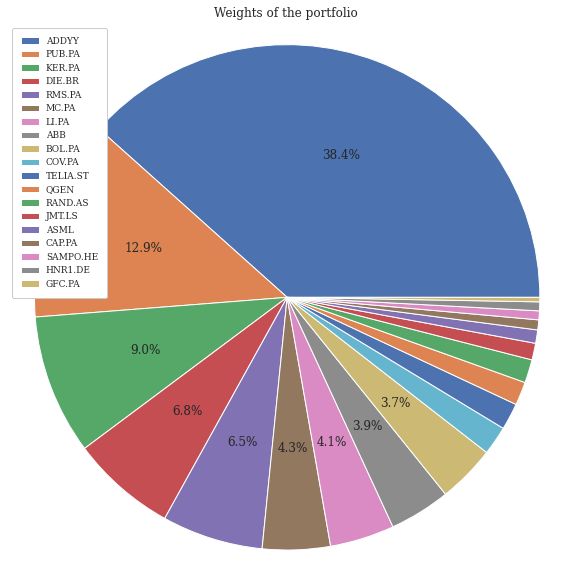

In [165]:
pf.plot_weights(weights[1])

It works!